# Data Analysis and Prediction of Credit Card Fraud Detection Data

This Python notebook contains a data analysis of credit card fraud data from Kaggle (https://www.kaggle.com/dalpozz/creditcardfraud), along with a predictive model aiming at detecting a fraudulent transaction. The predictive model to be developed is a neural network implemented in tensorflow.

First we load in the required libraries and the data set we are going to be working with.

The data set has been anonymized for confidentiality and the features V1,..., V28 are the principal components of a PCA transformation. There is two other variables: Amount and Class. Amount denoting the amount of money of the transaction; Class denotes a fraudulent transaction, 0, or normal transaction, 1; and Time, an integer denoting time since first transaction in seconds. Also note that the entire data set is two days of credit card transactions.

So let's take a look at the structure of the data set and do some analysis.

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
dataset = pd.read_csv("creditcard.csv", header = 0)

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("Percent of total transactions that are fraudulent")
print(dataset["Class"].mean()*100)

Percent of total transactions that are fraudulent
0.1727485630620034


Fraudulent transactions represent only ~0.17% of total transactions. This means that we are aiming to predict anomalous events.

In [6]:
print("Losses due to fraud:")
print("Total amount lost to fraud")
print(dataset.Amount[dataset.Class == 1].sum())
print("Mean amount per fraudulent transaction")
print(dataset.Amount[dataset.Class == 1].mean())
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(dataset.Amount[dataset.Class == 0].sum())
print("Mean amount per normal transactions")
print(dataset.Amount[dataset.Class == 0].mean())

Losses due to fraud:
Total amount lost to fraud
60127.96999999997
Mean amount per fraudulent transaction
122.21132113821133
Compare to normal transactions:
Total amount from normal transactions
25102462.039983638
Mean amount per normal transactions
88.29102242225574


It is interesting to see that while fraudulent transactions make up a small portion of the data set, they have a higher average amount per transaction. It may be useful to try a model with Amount as a feature.

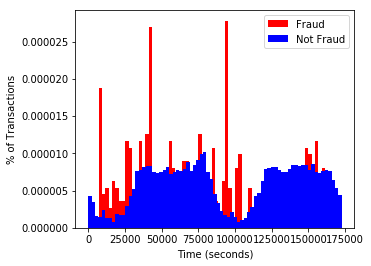

In [8]:
bins = 75
plt.hist(dataset.Time[dataset.Class == 1], bins, normed = True, label = 'Fraud', color = 'red')
plt.hist(dataset.Time[dataset.Class == 0], bins, normed = True, label = 'Not Fraud', color = 'blue')
plt.legend(loc='upper right')
plt.xlabel('Time (seconds)')
plt.ylabel('% of Transactions')
plt.show()

This histogram shows the percentage of transactions made over the time period. We see that more fraudulent activity typically happens when there is downtime in overall transactions. If we assume that the data is collected from Day 0 12:01 AM to Day 2 11:59 PM, since it is described as being collected over "two days", we see that fraudulent activity is occuring in the very early AM.